In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [6]:
energy_stats=pd.read_excel('../Data/U.S. Electricity Generation Fuel Shares.xlsx')
energy_stats.head()


,Year,Coal (%),Petroleum (%),Natural Gas (%),Other Gases (%),Nuclear (%),Hydro (%),Wood (%),Waste (%),Geothermal (%),Solar - PV (%),Wind (%)
0,1949,45.7,9.6,12.5,-,0.0,32.0,0.1,-,-,-,-
1,1950,46.3,10.1,13.3,-,0.0,30.2,0.1,-,-,-,-
2,1951,49.3,7.7,15.1,-,0.0,27.8,0.1,-,-,-,-
3,1952,48.4,7.4,17.0,-,0.0,27.2,0.1,-,-,-,-
4,1953,49.0,8.6,17.8,-,0.0,24.5,0.1,-,-,-,-


In [5]:
energy_stats.describe()

,Year,Coal (%),Petroleum (%),Natural Gas (%),Nuclear (%),Hydro (%),Wood (%)
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1984.000000,48.504225,5.991549,18.821127,11.433803,13.222535,0.452113
std,20.639767,6.976889,4.592781,6.244401,8.596111,6.589346,0.501671
min,1949.000000,23.500000,0.500000,9.300000,0.000000,5.600000,0.000000
25%,1966.500000,45.800000,2.800000,14.300000,0.550000,7.350000,0.000000
50%,1984.000000,50.800000,5.500000,17.800000,13.500000,11.500000,0.100000
75%,2001.500000,52.950000,7.550000,21.800000,19.500000,17.900000,1.000000
max,2019.000000,56.900000,16.900000,38.400000,20.600000,32.000000,1.200000


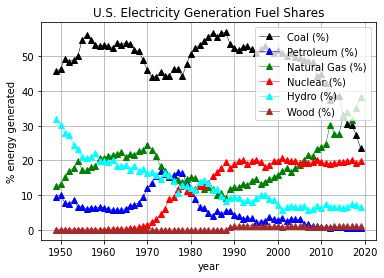

<Figure size 2520x720 with 0 Axes>

In [12]:
x_axis=energy_stats['Year']
y1=energy_stats['Coal (%)']
y2=energy_stats['Petroleum (%)']
y3=energy_stats['Natural Gas (%)']
y4=energy_stats['Nuclear (%)']
y5=energy_stats['Hydro (%)']
y6=energy_stats['Wood (%)']
plt.plot(x_axis,y1,linewidth=0.5, marker='^', color='black',label="Coal (%)")
plt.plot(x_axis,y2,linewidth=0.5, marker='^', color='b', label="Petroleum (%)")
plt.plot(x_axis,y3,linewidth=0.5, marker='^', color='g', label="Natural Gas (%)")
plt.plot(x_axis,y4,linewidth=0.5, marker='^', color='r', label="Nuclear (%)")
plt.plot(x_axis,y5,linewidth=0.5, marker='^', color='aqua', label="Hydro (%)")
plt.plot(x_axis,y6,linewidth=0.5, marker='^', color='brown', label="Wood (%)")

plt.title("U.S. Electricity Generation Fuel Shares")
plt.xlabel("year")
plt.ylabel("% energy generated")
plt.legend()
plt.grid()
plt.figure(figsize=(35,10))
#plt.savefig("../Images/U.S. Electricity Generation Fuel Shares.png")
plt.show()

